# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# 1. Подготовка данных

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.metrics import f1_score

In [10]:
import matplotlib.pyplot as plt

In [11]:
from sklearn.utils import shuffle

In [12]:
from sklearn.metrics import precision_score, recall_score

In [13]:
from sklearn.metrics import roc_auc_score

In [14]:
clients = pd.read_csv('/datasets/Churn.csv')

# Признаки
    RowNumber — индекс строки в данных
    CustomerId — уникальный идентификатор клиента
    Surname — фамилия
    CreditScore — кредитный рейтинг
    Geography — страна проживания
    Gender — пол
    Age — возраст
    Tenure — количество недвижимости у клиента
    Balance — баланс на счёте
    NumOfProducts — количество продуктов банка, используемых клиентом
    HasCrCard — наличие кредитной карты
    IsActiveMember — активность клиента
    EstimatedSalary — предполагаемая зарплата
# Целевой признак
    Exited — факт ухода клиента

In [15]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [16]:
clients.head(40)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Видим около 900 пропусков в столбце с количеством недвижимости.
Пробуем заполнить пропуски медианным значением количества недвижимости, как у людей такого же возраста.

In [17]:
clients['Tenure'] = clients['Tenure'].fillna(clients.groupby('Age')['Tenure'].transform('median'))

In [18]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Теперь все пропуски заполнены.

In [19]:
clients_with_dummies = pd.get_dummies(clients, columns=['Gender', 'Geography'])
# методом прямого кодирования переводим признаки пола и страны в численные, чтобы можно было анализировать

In [20]:
#clients_with_dummies.head()

Разделяем исходные данные на обучающую, валидационную и тестовую выборки в соотношении 3:1:1 за два этапа.

In [21]:
target = clients_with_dummies['Exited'] 
features = clients_with_dummies.drop(columns=['Exited','RowNumber', 'CustomerId', 'Surname'], axis=1)
#Чтобы не мешать модели, удалим и столбцы, которые не несут нужной нам информации. 
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.4, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5, random_state=12345)

In [22]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
# выделяем столбцы с численными значениями признаков

In [23]:
scaler = StandardScaler() # проводим стандартизацию данных, т.к. имеем большой разброс значений для разных столбцов
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

# 2. Исследование задачи

In [24]:
print(clients['Exited'].value_counts())

0    7963
1    2037
Name: Exited, dtype: int64


Наблюдаем значительный дисбаланс классов: отношение ушедших клиентов к оставшимся 1:4.

Для начала обучим модель без учёта дисбаланса.
В качестве метрики будем использовать F1-меру. 

In [25]:
model = LogisticRegression(random_state=12345, solver='liblinear') # будем исследовать модель логистической регрессии
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('F-1 мера:', f1_score(target_valid, predicted_valid))

F-1 мера: 0.33389544688026984


In [26]:
# будем исследовать модель классификации деревом решений для разной максимальной глубины дерева

model1_f1_train = {}
for depth in range(1, 20): # проверяем модель на тренировочной выборке
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predicted_train = model.predict(features_train)
    print('max_depth =', depth, ':', end='')
    print(f1_score(target_train, predicted_train))
    k1 = depth
    model1_f1_train[k1] = f1_score(target_train, predicted_train) 
print(model1_f1_train)

max_depth = 1 :0.0
max_depth = 2 :0.5142576204523107
max_depth = 3 :0.4157160963244613
max_depth = 4 :0.5394456289978677
max_depth = 5 :0.5579119086460032
max_depth = 6 :0.596842105263158
max_depth = 7 :0.6248693834900731
max_depth = 8 :0.6473072861668427
max_depth = 9 :0.7056530214424952
max_depth = 10 :0.7427160493827161
max_depth = 11 :0.7986921999065858
max_depth = 12 :0.8446866485013624
max_depth = 13 :0.8853932584269664
max_depth = 14 :0.9176574196389256
max_depth = 15 :0.9393139841688655
max_depth = 16 :0.9589632829373651
max_depth = 17 :0.9758781210325856
max_depth = 18 :0.9847844463229077
max_depth = 19 :0.9915895710681246
{1: 0.0, 2: 0.5142576204523107, 3: 0.4157160963244613, 4: 0.5394456289978677, 5: 0.5579119086460032, 6: 0.596842105263158, 7: 0.6248693834900731, 8: 0.6473072861668427, 9: 0.7056530214424952, 10: 0.7427160493827161, 11: 0.7986921999065858, 12: 0.8446866485013624, 13: 0.8853932584269664, 14: 0.9176574196389256, 15: 0.9393139841688655, 16: 0.9589632829373651, 

In [27]:
model1_f1_valid = {}
for depth in range(1, 20): # проверяем модель классификации деревом решений на валидационной выборке
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print('max_depth =', depth, ':', end='')
    print(f1_score(target_valid, predicted_valid)) 
    k2 = depth
    model1_f1_valid[k2] = f1_score(target_valid, predicted_valid)

max_depth = 1 :0.0
max_depth = 2 :0.5217391304347825
max_depth = 3 :0.4234875444839857
max_depth = 4 :0.5528700906344411
max_depth = 5 :0.5406249999999999
max_depth = 6 :0.5666666666666667
max_depth = 7 :0.5462962962962963
max_depth = 8 :0.5379939209726444
max_depth = 9 :0.5610098176718092
max_depth = 10 :0.5369318181818182
max_depth = 11 :0.5284015852047557
max_depth = 12 :0.5233160621761658
max_depth = 13 :0.5077319587628866
max_depth = 14 :0.5162907268170427
max_depth = 15 :0.49811320754716976
max_depth = 16 :0.4987654320987654
max_depth = 17 :0.5006075334143378
max_depth = 18 :0.4981949458483754
max_depth = 19 :0.498220640569395


Text(0.5, 0, 'max depth')

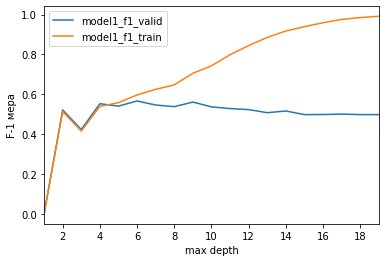

In [28]:
model1_f1_valid = pd.Series(model1_f1_valid)
model1_f1_train = pd.Series(model1_f1_train)
model1_f1 = pd.DataFrame({'model1_f1_valid': model1_f1_valid, 'model1_f1_train': model1_f1_train})
#print(model1_acuracy)
model1_f1.plot()
plt.ylabel('F-1 мера')
plt.xlabel('max depth')

Из графиков видим, что при глубине более 4 модель уже переобучается.
Оптимальное значение глубины - 4.

In [29]:
# будем исследовать модель случайного леса для разного количества деревьев

model2_f1_train = {}

for estim in range(2, 103, 10): # проверяем модель на тренировочной выборке
    model = RandomForestClassifier(n_estimators=estim, random_state=12345)
    model.fit(features_train, target_train)
    predicted_train = model.predict(features_train)
    f1 = f1_score(target_train, predicted_train)
    print("n_estimators =", estim, ":", f1)
    k3 = estim
    model2_f1_train[k3] = f1_score(target_train, predicted_train)
#print(model2_f1_train)

n_estimators = 2 : 0.7732934728450425
n_estimators = 12 : 0.9664371772805507
n_estimators = 22 : 0.9894381073088298
n_estimators = 32 : 0.9936895246108539
n_estimators = 42 : 0.997485331098072
n_estimators = 52 : 0.998324958123953
n_estimators = 62 : 0.9987442444537463
n_estimators = 72 : 0.999581764951903
n_estimators = 82 : 0.999581764951903
n_estimators = 92 : 0.999581764951903
n_estimators = 102 : 0.999581764951903


In [30]:
model2_f1_valid = {}

for estim in range(2, 103, 10): # проверяем модель случайного леса на валидационной выборке
    model = RandomForestClassifier(n_estimators=estim, random_state=12345)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print("n_estimators =", estim, ":", f1)
    k4 = estim
    model2_f1_valid[k4] = f1_score(target_valid, predicted_valid) 

n_estimators = 2 : 0.36741214057507987
n_estimators = 12 : 0.5432835820895522
n_estimators = 22 : 0.5610859728506787
n_estimators = 32 : 0.5636363636363636
n_estimators = 42 : 0.5735735735735735
n_estimators = 52 : 0.5696969696969697
n_estimators = 62 : 0.5765765765765767
n_estimators = 72 : 0.5697151424287856
n_estimators = 82 : 0.5697151424287856
n_estimators = 92 : 0.5718608169440242
n_estimators = 102 : 0.5744680851063829


Text(0.5, 0, 'n_estimators')

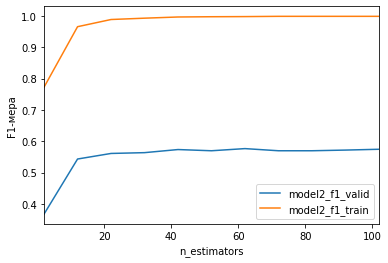

In [31]:
model2_f1_valid = pd.Series(model2_f1_valid)
model2_f1_train = pd.Series(model2_f1_train)
model2_f1 = pd.DataFrame({'model2_f1_valid': model2_f1_valid, 'model2_f1_train': model2_f1_train})

model2_f1.plot()
plt.ylabel('F1-мера')
plt.xlabel('n_estimators')

Точность на тренировочной выборке выше, чем на валидационной - модель переобучена.

Общий вывод:
    при обучении модель без учёта дисбаланса тремя методами мы получили следующие результаты:
    1. для модели логистической регресии F1-мера: 0.33
    2. для модели случайного леса сразу происходит переобучение из-за дисбаланса, при избавлении от него будем использовать количество деревьев 10.
    3. для модели классификации деревом решений получили максимальное значение F1-меры 0,55 для максимальной глубины 4. Это наилучший результат из трех моделей, но нам нужно его еще повысить. 

# 3. Борьба с дисбалансом

Придадим объектам редкого класса больший вес (клиенты, которые расторгли договор).

In [32]:
model = DecisionTreeClassifier(random_state=12345, max_depth=4, class_weight='balanced')
# Если указать class_weight='balanced', больший вес будет у редкого класса
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print(f1_score(target_valid, predicted_valid)) 

0.5277777777777778


F1-мера даже снизилась до 0.528. Этот варинт не подходит для дерева решений.

In [33]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced') 
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('F-1 мера:', f1_score(target_valid, predicted_valid))

F-1 мера: 0.4888507718696398


Для логистической регрессии F1-мера повысилась от 0.33 до 0.49

In [34]:
model = RandomForestClassifier(n_estimators=10, random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
print( f1)

0.5381026438569206


Для модели случайного леса результат ниже, чем для вариантов без учета классов,но должен быть точнее.

In [35]:
def downsample(features, target, fraction): # используем downsampling, чтобы убрать часть неважных данных (20%, чтобы не терять много данных)
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.8)

In [36]:
model = DecisionTreeClassifier(random_state=12345, max_depth=4) 
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5209003215434084


Этот варинт не подходит для дерева решений, эффекта нет.

In [37]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced') 
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('F-1 мера:', f1_score(target_valid, predicted_valid))

F-1 мера: 0.48805460750853236


Для логистической регресии ээфекта также нет.

In [38]:
model = RandomForestClassifier(n_estimators=10, random_state=12345, class_weight='balanced')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('F-1 мера:', f1_score(target_valid, predicted_valid))

F-1 мера: 0.5387994143484627


Для модели стучайного леса также эффекта нет.
Не будем учитывать это преобразование (с другими частями удаления также не работало, поэтому я и не включила эти преобразования в начальную версию работы).

In [39]:
def upsample(features, target, repeat): #применяем метод upsampling для увеличения доли с 1
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 2)

In [40]:
model = DecisionTreeClassifier(random_state=12345, max_depth=4) 
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.572987721691678


Для дерева решений увеличение доли меньшего класса увеличивает F1-меру до 0.57

In [41]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced') 
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('F-1 мера:', f1_score(target_valid, predicted_valid))

F-1 мера: 0.4888507718696398


Для логистической регрессии даже немного уменьшил показатель.

In [42]:
model = RandomForestClassifier(n_estimators=10, random_state=12345, class_weight='balanced')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('F-1 мера:', f1_score(target_valid, predicted_valid))

F-1 мера: 0.5738636363636364


Пробуем подобрать оптимальное значение порога, чтобы увеличить F1-меру.

In [43]:
model = DecisionTreeClassifier(random_state=12345, max_depth=4) 
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
for threshold in np.arange(0, 0.7, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    f1 = f1_score(target_valid, predicted_valid)
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print("Порог = {:.2f} | F1-мера = {:.3f} | auc-roc = {:.3f}".format(threshold, f1, auc_roc))

Порог = 0.00 | F1-мера = 0.345 | auc-roc = 0.813
Порог = 0.02 | F1-мера = 0.345 | auc-roc = 0.813
Порог = 0.04 | F1-мера = 0.401 | auc-roc = 0.813
Порог = 0.06 | F1-мера = 0.401 | auc-roc = 0.813
Порог = 0.08 | F1-мера = 0.401 | auc-roc = 0.813
Порог = 0.10 | F1-мера = 0.401 | auc-roc = 0.813
Порог = 0.12 | F1-мера = 0.401 | auc-roc = 0.813
Порог = 0.14 | F1-мера = 0.401 | auc-roc = 0.813
Порог = 0.16 | F1-мера = 0.447 | auc-roc = 0.813
Порог = 0.18 | F1-мера = 0.447 | auc-roc = 0.813
Порог = 0.20 | F1-мера = 0.447 | auc-roc = 0.813
Порог = 0.22 | F1-мера = 0.447 | auc-roc = 0.813
Порог = 0.24 | F1-мера = 0.531 | auc-roc = 0.813
Порог = 0.26 | F1-мера = 0.531 | auc-roc = 0.813
Порог = 0.28 | F1-мера = 0.531 | auc-roc = 0.813
Порог = 0.30 | F1-мера = 0.549 | auc-roc = 0.813
Порог = 0.32 | F1-мера = 0.549 | auc-roc = 0.813
Порог = 0.34 | F1-мера = 0.549 | auc-roc = 0.813
Порог = 0.36 | F1-мера = 0.549 | auc-roc = 0.813
Порог = 0.38 | F1-мера = 0.549 | auc-roc = 0.813
Порог = 0.40 | F1-ме

In [44]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced') 
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
for threshold in np.arange(0, 0.7, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    f1 = f1_score(target_valid, predicted_valid)
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print("Порог = {:.2f} | F1-мера = {:.3f} | auc-roc = {:.3f}".format(threshold, f1, auc_roc))

Порог = 0.00 | F1-мера = 0.346 | auc-roc = 0.764
Порог = 0.02 | F1-мера = 0.346 | auc-roc = 0.764
Порог = 0.04 | F1-мера = 0.346 | auc-roc = 0.764
Порог = 0.06 | F1-мера = 0.347 | auc-roc = 0.764
Порог = 0.08 | F1-мера = 0.349 | auc-roc = 0.764
Порог = 0.10 | F1-мера = 0.354 | auc-roc = 0.764
Порог = 0.12 | F1-мера = 0.359 | auc-roc = 0.764
Порог = 0.14 | F1-мера = 0.368 | auc-roc = 0.764
Порог = 0.16 | F1-мера = 0.375 | auc-roc = 0.764
Порог = 0.18 | F1-мера = 0.380 | auc-roc = 0.764
Порог = 0.20 | F1-мера = 0.387 | auc-roc = 0.764
Порог = 0.22 | F1-мера = 0.398 | auc-roc = 0.764
Порог = 0.24 | F1-мера = 0.402 | auc-roc = 0.764
Порог = 0.26 | F1-мера = 0.407 | auc-roc = 0.764
Порог = 0.28 | F1-мера = 0.415 | auc-roc = 0.764
Порог = 0.30 | F1-мера = 0.424 | auc-roc = 0.764
Порог = 0.32 | F1-мера = 0.431 | auc-roc = 0.764
Порог = 0.34 | F1-мера = 0.440 | auc-roc = 0.764
Порог = 0.36 | F1-мера = 0.451 | auc-roc = 0.764
Порог = 0.38 | F1-мера = 0.464 | auc-roc = 0.764
Порог = 0.40 | F1-ме

In [45]:
model = RandomForestClassifier(n_estimators=10, random_state=12345, class_weight='balanced')
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
for threshold in np.arange(0, 0.7, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    f1 = f1_score(target_valid, predicted_valid)
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print("Порог = {:.2f} | F1-мера = {:.3f} | auc-roc = {:.3f}".format(threshold, f1, auc_roc))

Порог = 0.00 | F1-мера = 0.427 | auc-roc = 0.814
Порог = 0.02 | F1-мера = 0.427 | auc-roc = 0.814
Порог = 0.04 | F1-мера = 0.427 | auc-roc = 0.814
Порог = 0.06 | F1-мера = 0.427 | auc-roc = 0.814
Порог = 0.08 | F1-мера = 0.427 | auc-roc = 0.814
Порог = 0.10 | F1-мера = 0.491 | auc-roc = 0.814
Порог = 0.12 | F1-мера = 0.491 | auc-roc = 0.814
Порог = 0.14 | F1-мера = 0.491 | auc-roc = 0.814
Порог = 0.16 | F1-мера = 0.491 | auc-roc = 0.814
Порог = 0.18 | F1-мера = 0.491 | auc-roc = 0.814
Порог = 0.20 | F1-мера = 0.542 | auc-roc = 0.814
Порог = 0.22 | F1-мера = 0.542 | auc-roc = 0.814
Порог = 0.24 | F1-мера = 0.542 | auc-roc = 0.814
Порог = 0.26 | F1-мера = 0.542 | auc-roc = 0.814
Порог = 0.28 | F1-мера = 0.542 | auc-roc = 0.814
Порог = 0.30 | F1-мера = 0.577 | auc-roc = 0.814
Порог = 0.32 | F1-мера = 0.577 | auc-roc = 0.814
Порог = 0.34 | F1-мера = 0.577 | auc-roc = 0.814
Порог = 0.36 | F1-мера = 0.577 | auc-roc = 0.814
Порог = 0.38 | F1-мера = 0.577 | auc-roc = 0.814
Порог = 0.40 | F1-ме

# Общий вывод по изменению порогов:
 На дерево решений и логистическую регрессию изменение порогов не позволило нам дотянуть до нужного нам показателя.
 А для модели случайного леса такой порог мы нашли - 0.4 с соответствующим значенем F1-меры 0.591 (значение auc-roc = 0.814 - постоянное для любых порогов и больше, чем в случае с другими моделями).
 
 

In [46]:
model = RandomForestClassifier(n_estimators=10, random_state=12345, class_weight='balanced') # используем найденный нами порог
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
probabilities_one_valid_threshold = np.where(probabilities_one_valid > 0.4, 1, 0)
predicted_valid = probabilities_one_valid_threshold
f1 = f1_score(target_valid, predicted_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid_threshold)
print('F1-мера', f1, 'auc_roc', auc_roc)

F1-мера 0.5911330049261084 auc_roc 0.7384087733412372


# 4. Тестирование модели

In [47]:
model = RandomForestClassifier(n_estimators=10, random_state=12345, class_weight='balanced')
model.fit(features_upsampled, target_upsampled)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
probabilities_one_test_threshold = np.where(probabilities_one_test > 0.4, 1, 0)
predicted_test = probabilities_one_test_threshold
f1 = f1_score(target_test, predicted_test)
auc_roc = roc_auc_score(target_valid, probabilities_one_test_threshold)
print('F1-мера', f1, 'auc_roc', auc_roc)

F1-мера 0.5591133004926109 auc_roc 0.4889592242875894


# Общий вывод

При работе с данными со значительным дисбалансом классов качество работы моделей может сильно отличатся от вариантов, когда дисбаланс классов максимально нивелирован.

При улучшении качества моделей при дисбалансе классов разные инструменты работают по разному как для датасета, так и для разных моделей, поэтому нужво проверять разные варианты.

При использовании разных способов мы выбрали лучшую модель - модели случайного леса (кол-во деревьев 10 с порогом 0.4). Она продемострировала нужное нам значение F1-меры 0.591 (значение auc-roc = 0.814 - постоянное для любых порогов и больше, чем в случае с другими моделями).

К сожалению, на тестовой модели результат оказался ниже:
   - F1-мера=0.559 и auc_roc=0.489.